<a href="https://colab.research.google.com/github/bhuvantare2-cmd/quantum-circuit-simulations/blob/main/Quantum_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**QUANTUM ALGORITHMS **

In [2]:
! pip install qiskit
! pip install matplotlib
! pip install pylatexenc
! pip install scipy
! pip install numpy
! pip install qiskit_aer
! pip install qiskit_algorithms
! pip install qiskit_ibm_provider
! pip install qiskit-ibm-runtime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 52.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 73.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=a51a19c2330d7a7fea5da8017e3e3493faf45e7035e00db9e0282991e3ad7776
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178beee1939180d46
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 82.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 327.8/327.8 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.9/249.9 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━

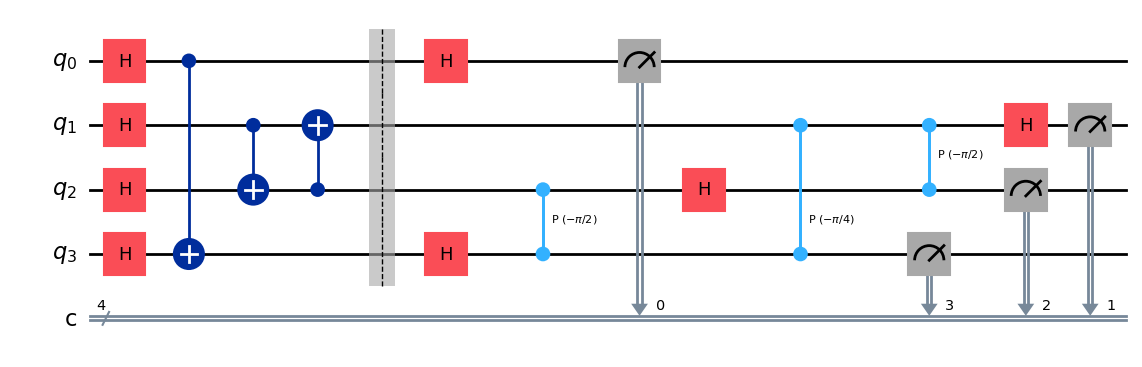

Possible factors of 15: (3, 5)


In [3]:
#Shor's Algorithm
# Import required libraries
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator
from math import gcd
import numpy as np

# --------------------------
# Step 1: Defining basic parameters
# --------------------------
N = 15    # Number to factor
a = 7     # Random co-prime integer with N

# Function to find classical factors after period r is found
def get_factors(N, a, r):
    if r % 2 != 0:
        return None
    factor1 = gcd(pow(a, r//2) - 1, N)
    factor2 = gcd(pow(a, r//2) + 1, N)
    if factor1 * factor2 == N:
        return factor1, factor2
    else:
        return None

# --------------------------
# Step 2: Building simple quantum circuit
# --------------------------
# This simplified circuit represents the quantum part that finds the period
qc = QuantumCircuit(4, 4)

# Applying Hadamard gates (superposition)
qc.h([0, 1, 2, 3])

# Example controlled unitary (placeholder for modular exponentiation)
qc.cx(0, 3)
qc.cx(1, 2)
qc.cx(2, 1)
qc.barrier()

# Applying inverse Quantum Fourier Transform (QFT†) approximation
qc.h(3)
qc.cp(-np.pi/2, 2, 3)
qc.h(2)
qc.cp(-np.pi/4, 1, 3)
qc.cp(-np.pi/2, 1, 2)
qc.h(1)
qc.h(0)

# Measuring all qubits
qc.measure(range(4), range(4))

# Drawing the circuit
qc.draw('mpl')
display(qc.draw('mpl'))

# Example of classical step after finding period r
r = 4  # For N=15, a=7, we expect r=4
factors = get_factors(N, a, r)
print(f"Possible factors of {N}: {factors}")



Grover Circuit:


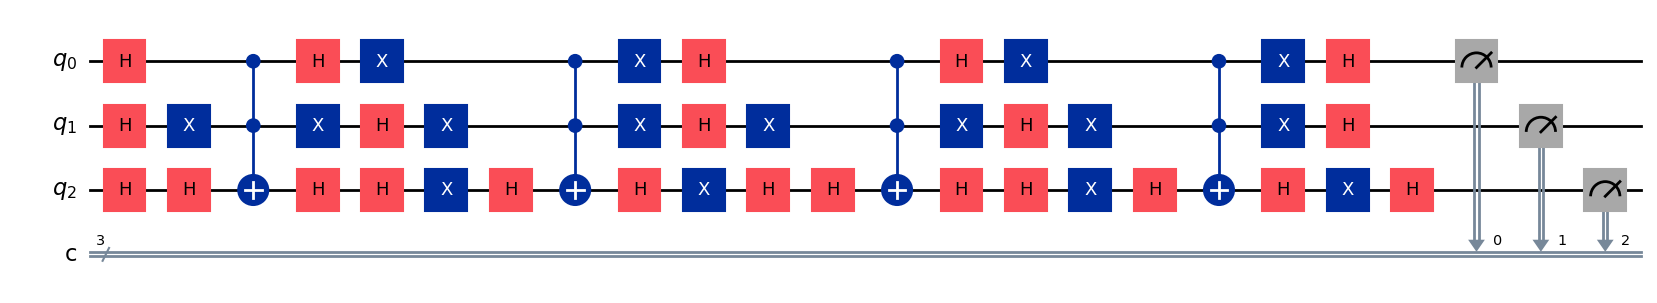


Measurement Results:
{'110': 6, '001': 8, '010': 9, '000': 5, '111': 11, '011': 9, '100': 9, '101': 967}

Expected Target: |101> (Decimal: 5)
Most Common Outcome: |101>
Grover's algorithm successfully found the target state!


In [4]:
from qiskit import QuantumCircuit
from qiskit_aer import Aer # Corrected import for Aer
import numpy as np

# 1. Creating Oracle for target state |x*>

def grover_oracle(n, target):
    qc = QuantumCircuit(n)
    target_bin = format(target, f'0{n}b')

    # Flip bits where target has 0
    for i, bit in enumerate(target_bin):
        if bit == '0':
            qc.x(i)

    # Multi-controlled Z gate (Z on last qubit)
    # This is implemented as H-MCX-H
    qc.h(n-1)
    # mcx needs control qubits as a list, and then the target qubit
    if n > 1: # only apply mcx if there are control qubits
        qc.mcx(list(range(n-1)), n-1)
    qc.h(n-1)

    # Undo bit flips
    for i, bit in enumerate(target_bin):
        if bit == '0':
            qc.x(i)

    return qc



# 2. Grover Diffusion Operator

def diffusion_operator(n):
    qc = QuantumCircuit(n)

    qc.h(range(n))
    qc.x(range(n))

    # Multi-controlled Z gate for the |0...0> state
    qc.h(n-1)
    if n > 1: # only apply mcx if there are control qubits
        qc.mcx(list(range(n-1)), n-1)
    qc.h(n-1)

    qc.x(range(n))
    qc.h(range(n))

    return qc



# 3. Full Grover Algorithm

def grover_search(n, target):
    qc = QuantumCircuit(n, n)

    # Step 1: Creating uniform superposition
    qc.h(range(n))

    # Number of iterations
    N_states = 2 ** n
    # Calculate optimal number of iterations based on N_states and M (number of marked states, here M=1)
    # Formula: round(pi/4 * sqrt(N/M)) -> for M=1, round(pi/4 * sqrt(N))
    iterations = int(np.floor(np.pi/4 * np.sqrt(N_states)))

    oracle_circuit = grover_oracle(n, target)
    diffuser_circuit = diffusion_operator(n)

    # Step 2: Grover Iterations
    for _ in range(iterations):
        # Use qc.compose() instead of qc.append(to_gate()) for better compatibility with Aer
        qc.compose(oracle_circuit, inplace=True, qubits=range(n))
        qc.compose(diffuser_circuit, inplace=True, qubits=range(n))

    qc.measure(range(n), range(n))
    return qc



# 4. Testing Grover (example: search for |101> = 5)

n = 3
target = 5   # state |101> (binary '101')
qc = grover_search(n, target)

print("Grover Circuit:")
display(qc.draw('mpl'))

backend = Aer.get_backend('qasm_simulator')
result = backend.run(qc, shots=1024).result() # Updated to use backend.run
counts = result.get_counts()

print("\nMeasurement Results:")
print(counts)

# Verify if the target state was found with high probability
most_common_outcome = max(counts, key=counts.get)
expected_outcome = format(target, f'0{n}b')

print(f"\nExpected Target: |{expected_outcome}> (Decimal: {target})")
print(f"Most Common Outcome: |{most_common_outcome}>")

if most_common_outcome == expected_outcome:
    print("Grover's algorithm successfully found the target state!")
else:
    print("Grover's algorithm did not find the target state with highest probability.")

Deutsch–Jozsa Circuit:


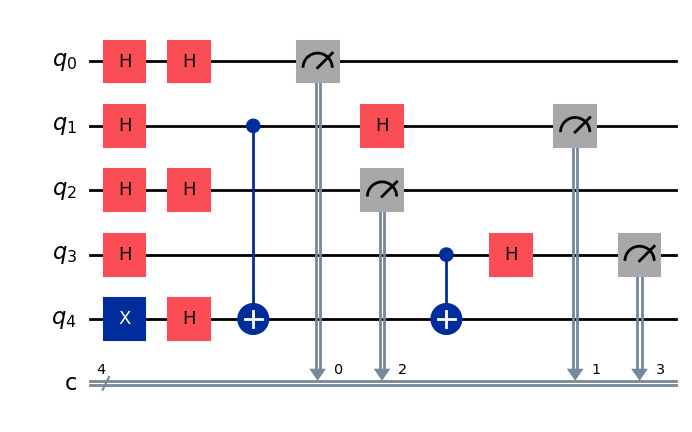


Measurement Counts:
{'1010': 1024}

RESULT: The function is BALANCED.


In [5]:
from qiskit import QuantumCircuit
from qiskit_aer import Aer  # Corrected import for Aer
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram
import numpy as np
import matplotlib.pyplot as plt

def constant_oracle(n, value):
    """
    constant f(x)=value  for all x
    value = 0 or 1
    """
    qc = QuantumCircuit(n + 1)

    if value == 1:
        qc.x(n)

    return qc


def balanced_oracle(n):
    """
    Balanced oracle: f(x)=parity of selected bits
    Builds a random balanced function
    """
    qc = QuantumCircuit(n + 1)

    bits = np.random.randint(0, 2, size=n)

    for i in range(n):
        if bits[i] == 1:
            qc.cx(i, n)

    return qc

def deutsch_jozsa(n, oracle):
    qc = QuantumCircuit(n + 1, n)

    # Step 1: Initializing input to |0> and output to |1>
    qc.x(n)

    # Step 2: Applying Hadamard to all qubits
    qc.h(range(n + 1))

    # Step 3: Append oracle
    qc.compose(oracle, inplace=True)

    # Step 4: Applying Hadamard to the input qubits
    qc.h(range(n))

    # Step 5: Measuring the input qubits
    qc.measure(range(n), range(n))

    return qc

# Choosing number of input qubits
n = 4

#oracle = constant_oracle(n, 0)
#oracle = constant_oracle(n, 1)
oracle = balanced_oracle(n)

# Building the full circuit
qc = deutsch_jozsa(n, oracle)

print("Deutsch–Jozsa Circuit:")
display(qc.draw('mpl'))


backend = Aer.get_backend('aer_simulator')

job = backend.run(qc, shots=1024)
result = job.result()
counts = result.get_counts()

print("\nMeasurement Counts:")
print(counts)

plot_histogram(counts)
plt.show()


if list(counts.keys()) == ['0' * n]:
    print("\nRESULT: The function is CONSTANT.")
else:
    print("\nRESULT: The function is BALANCED.")